SymPy

In [1]:
from sympy import *
#import numpy as np
from sympy import init_printing
init_printing(use_latex=True)

Variable initialisations

In [2]:
n = 3
'''
x = symbols('x0:{}'.format(n))
y = symbols('y0:{}'.format(n))
l = symbols('L0:{}'.format(n))
m = symbols('m0:{}'.format(n))
theta = symbols('theta_0:{}'.format(n))
'''
x = symarray('x', n)
y = symarray('y', n)
l = symarray('L', n)
m = symarray('m', n)
theta = symarray('theta', n)
t, g = symbols('t g')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode EXPIRED 3 days ago

    Your usage of mkl is now out of compliance with the license agreement.
    A license for mkl can be purchased at: http://continuum.io
    


State Equations

In [3]:
for j in range(0, n):
    x[j] = Add(*[l[i]*sin(theta[i](t)) for i in range(0, j+1)])
    y[j] = Add(*[l[i]*cos(theta[i](t)) for i in range(0, j+1)])

In [4]:
print(Symbol('x0'), ":", x[0])

x0 : L_0*sin(theta_0(t))


Total Kinetic Energy T

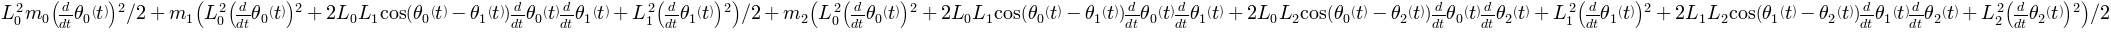

In [5]:
T = simplify(Rational(1, 2)*Add(*[m[i]*(x[i].diff(t)**2 + y[i].diff(t)**2) for i in range(0, n)]))
T

Total Potential Energy V

In [6]:
V = Add(*[-m[i]*g*y[i] for i in range(0, n)])
V

Lagrangian Lagra

In [7]:
thetadot = symarray('thetadot', n)

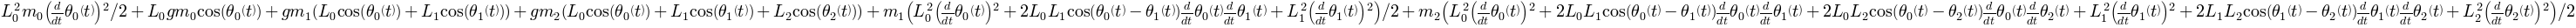

In [11]:
Lagra = (T - V)#.subs([(theta[i](t).diff(t), thetadot[i]) for i in range(0, n)])#.subs([(theta[i](t), theta[i]) for i in range(0, n)])
Lagra

In [16]:
term1 = symarray('term1', n)
term2 = symarray('term2', n)

In [17]:
term1 = [Lagra.diff(theta[i](t)) for i in range(0,n)]

In [18]:
term2 = [Lagra.diff(theta[i](t).diff(t)).diff(t) for i in range(0, n)]

In [19]:
eqn = symarray('eqn', n)
eqn = [term2[i] - term1[i] for i in range(0, n)]

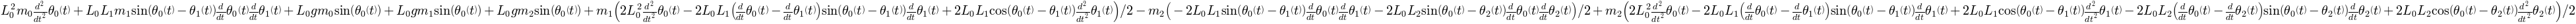

In [20]:
eqn[0]

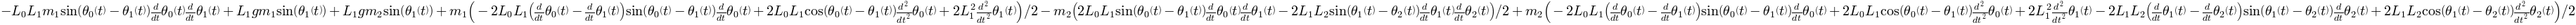

In [21]:
eqn[1]

In [28]:
thetaDd = solve(eqn, [theta[i](t).diff(t).diff(t) for i in range(0,n)])

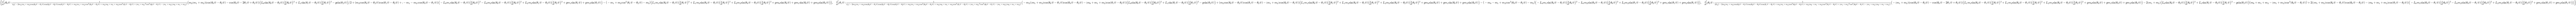

In [29]:
thetaDd

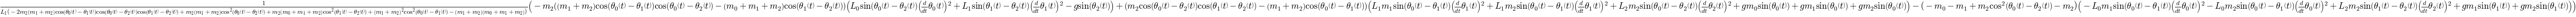

In [30]:
thetaDd[theta[1](t).diff(t).diff(t)]

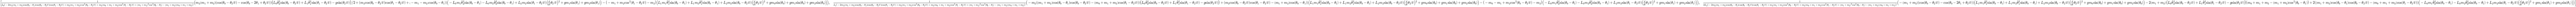

In [31]:
system_thetadotdot = [thetaDd[theta[j](t).diff(t, t)].\
                      subs([elem for elem_ in [\
                       [(theta[k](t).diff(t), thetadot[k]) for k in range(0,2)],\
                       [(theta[k](t), theta[k]) for k in range(0,2)]\
                      ] for elem in elem_]) for j in range(0,n)]
system_thetadotdot

In [32]:
system_xdot = [x[i].diff(t).subs([(theta[j](t).diff(t), thetadot[j](t)) for j in range(0, n)]) for i in range(0, n)]
system_xdot

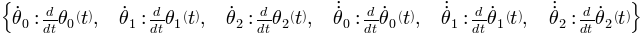

In [33]:
thetadotdot = symarray('thetadotdot', n)
system_dict = {key : value for (key, value) in [elem for elem_ in [\
                                                 [(thetadot[i], theta[i](t).diff(t)) for i in range(0, n)],\
                                                 [(thetadotdot[i], thetadot[i](t).diff(t)) for i in range(0, n)]\
                                                ] for elem in  elem_]}
system_dict

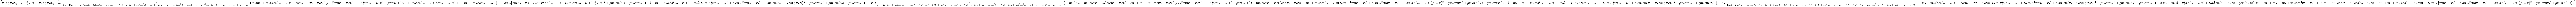

In [40]:
for i in range(0, n): system_dict[thetadotdot[i]] = system_thetadotdot[i]
system_dict

In [54]:
sys_para = {m[0] : 1, m[1] : 2, m[2] : 3,\
            l[0] : 1, l[1] : 1, l[2] : 1,\
            g : 9.81}
sys_para

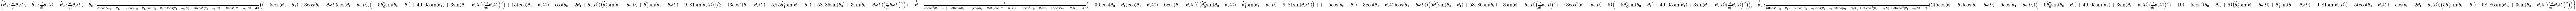

In [55]:

for i in range(0, n): system_dict[thetadotdot[i]] = system_dict[thetadotdot[i]].subs([(key, sys_para[key]) for elem_ in \
                                                                          [m, l, [g]]\
                                                                                          \
                                                       for key in elem_])
system_dict